In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

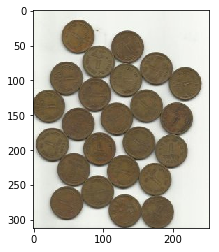

In [2]:
img = cv.imread("coin.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img);

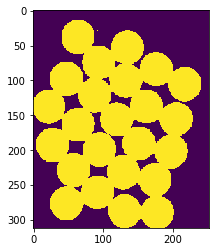

In [3]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh);

### Noise removal

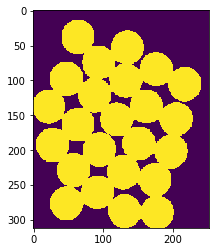

In [4]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)
plt.imshow(opening);

### Sure background area


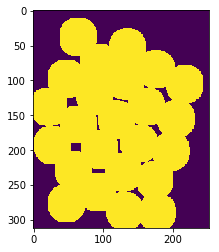

In [5]:
sure_bg = cv.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg);

### Finding sure foreground area

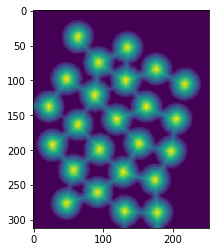

In [6]:
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
plt.imshow(dist_transform);

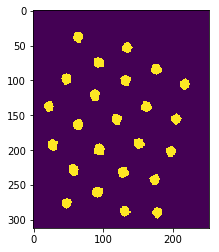

In [7]:
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg);

### Finding unknown region

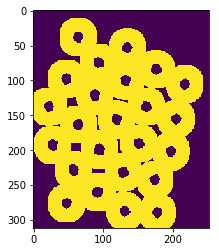

In [9]:
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.imshow(unknown);

### Marker labelling

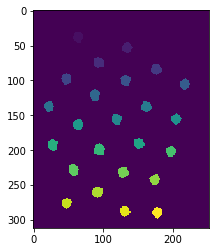

In [10]:
ret, markers = cv.connectedComponents(sure_fg)
plt.imshow(markers);

In [11]:
ret

25

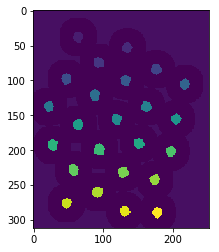

In [17]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers);

### Watershed
Now our marker is ready. It is time for final step, apply watershed. Then marker image will be modified. The boundary region will be marked with -1.

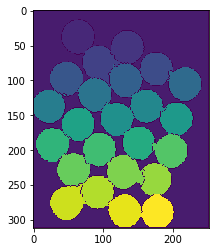

In [19]:
markers = cv.watershed(img,markers)
plt.imshow(markers);

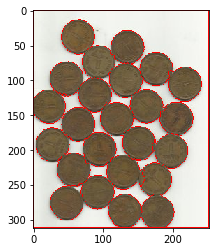

In [20]:
img[markers == -1] = [255,0,0]
plt.imshow(img);